In [130]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats as stats




In [131]:
#importing the kaggle data
kaggle_spot_df = pd.read_csv("Resources/kaggle_spotify.csv")

print(f'The are {len(kaggle_spot_df)} songs in this this data set')
kaggle_spot_df.head()

The are 169909 songs in this this data set


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


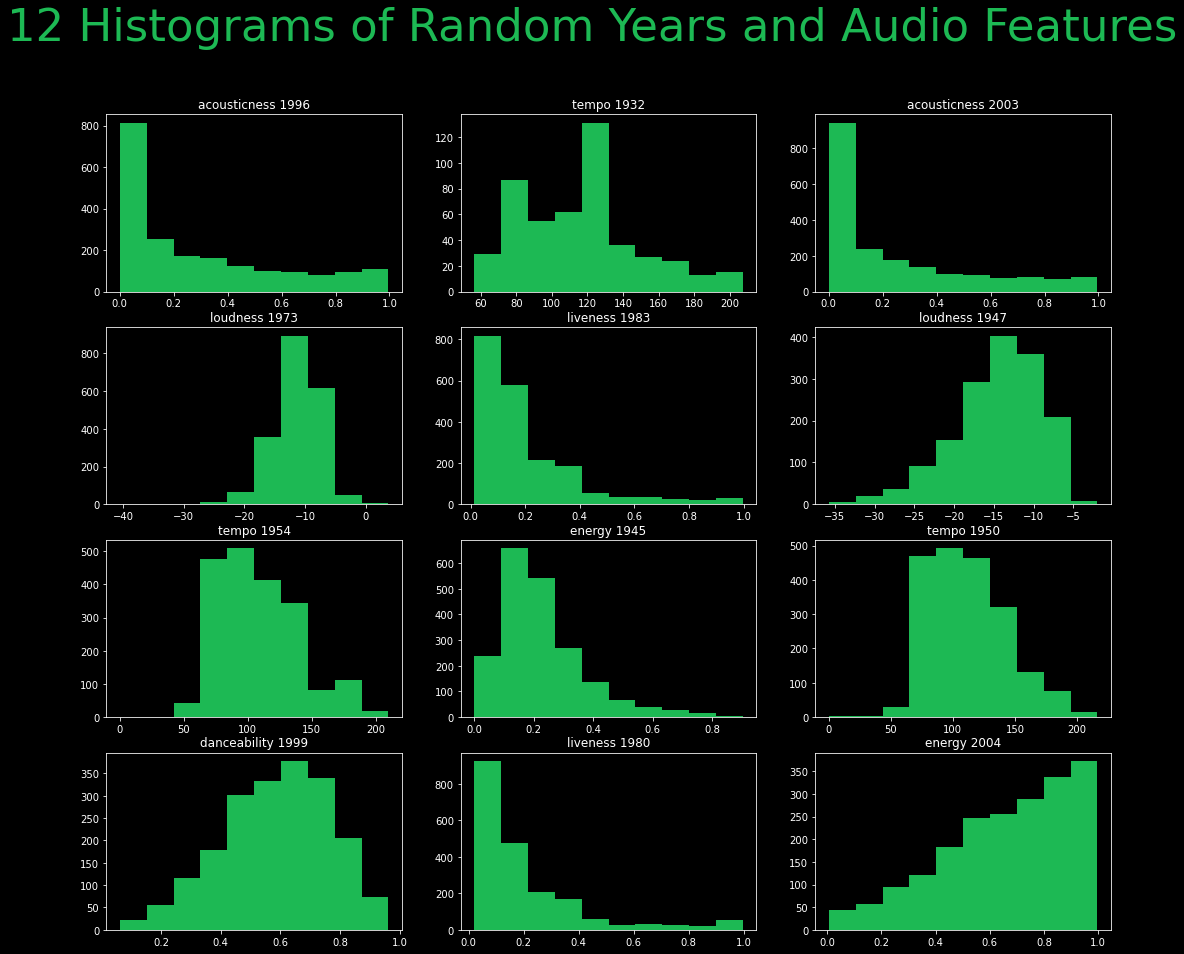

In [132]:
#review histograms of random year for 12 random spotify metrics. 

#creates a list of each year
years_list=kaggle_spot_df['year'].unique().tolist()

#list of each metric
metric_list=['acousticness','danceability','energy','instrumentalness','liveness','loudness', 'popularity','speechiness','tempo','valence']

##### creates 12 histograms for random years and audio features
fig_h=plt.figure(figsize=(18,15),facecolor='black')
fig_h.suptitle('12 Histograms of Random Years and Audio Features',color='#1DB954',fontsize=45)

for t in range(1,13):

    rando_year=random.choice(years_list)
    rando_metric=random.choice(metric_list)
    ax_h=fig_h.add_subplot(4,3,t)
    ax_h.spines['bottom'].set_color('white')
    ax_h.spines['top'].set_color('white')
    ax_h.spines['right'].set_color('white')
    ax_h.spines['left'].set_color('white')
    ax_h.tick_params(axis='x', colors='white')
    ax_h.tick_params(axis='y', colors='white')
    ax_h.yaxis.label.set_color('white')
    ax_h.xaxis.label.set_color('white')
    ax_h.title.set_color('white')
    ax_h.patch.set_alpha(0)
    plt.title(str(rando_metric)+' '+str(rando_year))
    histy=kaggle_spot_df.loc[kaggle_spot_df['year']==rando_year,:][rando_metric]
    plt.hist(histy,color='#1DB954')
plt.show()
 


In [133]:
### samples 10 random years for each audio features generating the P value for each...
# ... finds the average pvalue for each auido feature to determine if the audio feature is normally distributed

## adding the year for easier graphing in next cell
mean_graph_metric_list=['year']
median_graph_metric_list=['year']

### not sure what I should use for alpha, the line betweeen normal and not normal distribution 
alpha = 1e-3
# alpha= 0.05

# loop through a list of each audio feature(or metric)
for metric in metric_list:
    p_values_list=[]

    #we're gonna take this number of samples for each feature
    for a in range(10):
        #make a random year
        rando_year=random.choice(years_list)
        
        #run the normal test on a random year and the current audiot feature
        k2, p =stats.normaltest(kaggle_spot_df.loc[kaggle_spot_df['year']==rando_year,:][metric])

        p_values_list.append(p)

    #average of p values samples for current metric
    p_val_avg=sum(p_values_list)/len(p_values_list)

    # is it normally distributed or not? put the audio feature in the right list accordingly
    if p_val_avg < alpha:
        median_graph_metric_list.append(metric)
    else:
        mean_graph_metric_list.append(metric)


In [134]:

### creates a dataframe with the annual mean or median

## importing this from pandas to address DataError issue
from pandas.core.groupby.groupby import DataError
## added try block since mean list is empty sometimes
try:
    #dataframe of median metrics to be graphed
    median_annual_metrics_df=kaggle_spot_df[median_graph_metric_list].groupby('year').median()
    mean_annual_metrics_df=kaggle_spot_df[mean_graph_metric_list].groupby('year').mean()
    #merges the median dataframe and the mean dataframe together
    annual_metrics_df=pd.merge(median_annual_metrics_df,mean_annual_metrics_df,on='year')
except :
    print('one of these lists were empty')
    annual_metrics_df=kaggle_spot_df[['year','acousticness','danceability','energy','instrumentalness','liveness','loudness', 'popularity','speechiness','tempo','valence']].groupby('year').median()



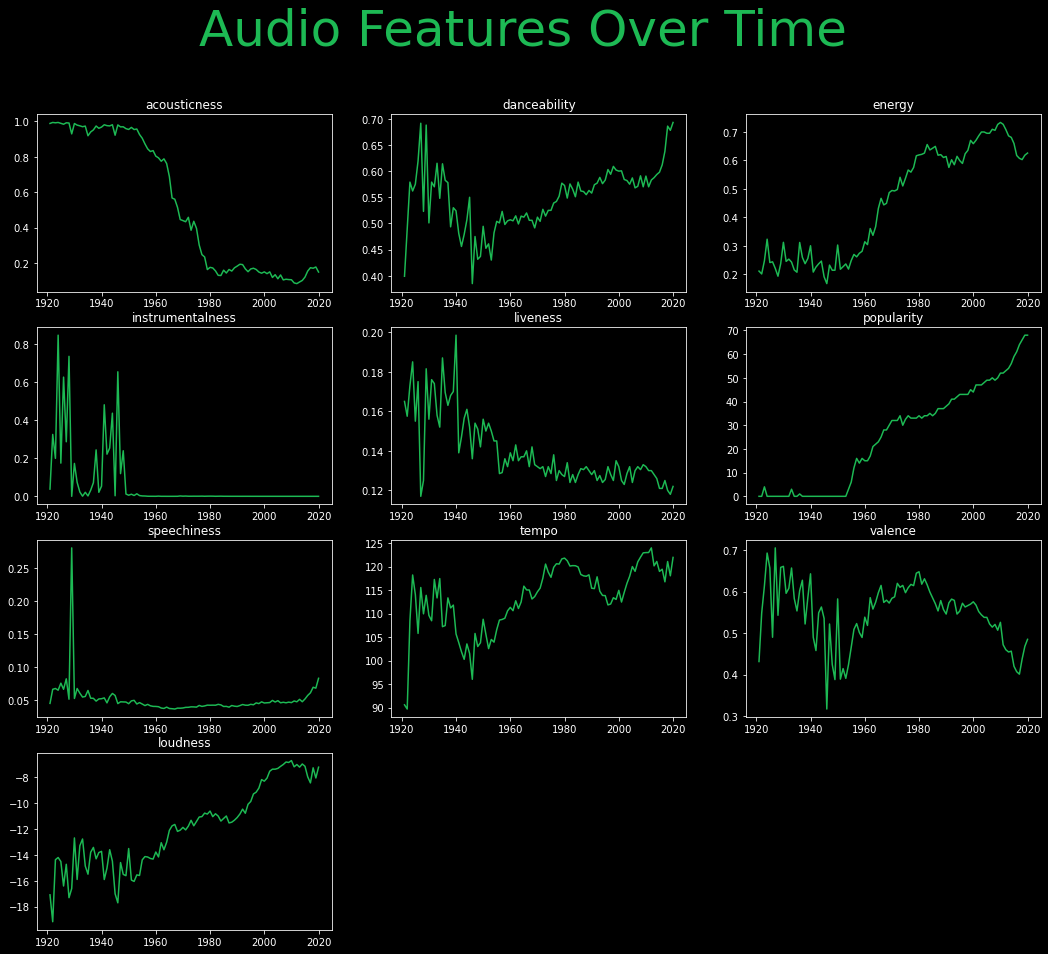

In [135]:


#graphs the average of each feature over time
def over_time_graphy(df):
    #turns the metric names into a list
    spot_metric_names=df.columns.to_list()
    ### plots graphs 4 by 3 with spotify colors
    fig = plt.figure(figsize=(18,15),facecolor='black')

    fig.suptitle('Audio Features Over Time',fontsize=50,color='#1DB954')
    for i in range(1,11):
        ax=fig.add_subplot(4,3,i)
        ax.spines['bottom'].set_color('white')
        ax.spines['top'].set_color('white')
        ax.spines['right'].set_color('white')
        ax.spines['left'].set_color('white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        ax.yaxis.label.set_color('white')
        ax.xaxis.label.set_color('white')
        ax.title.set_color('white')
        ax.patch.set_alpha(0)
        x=df.index
        y=df.iloc[:,i-1]
        plt.plot(x,y,c='#1DB954')
        plt.title(spot_metric_names[i-1])
    return plt.show()
over_time_graphy(annual_metrics_df)

